In [1]:
import sys
import os

# add the main directory to the notebook
sys.path.append(os.path.abspath(os.path.join('/home/lazaror/quantum/pruebas/EQCNN_local_testing/EQNN_for_HEP')))

import numpy as np
from Equivariant_QCNN.data.data import data_load_and_process
from Equivariant_QCNN.training.Training import circuit_training
from Equivariant_QCNN.models.QCNN_circuit import QCNN
import matplotlib.pyplot as plt
from Equivariant_QCNN.benchmarking.Benchmarking import accuracy_test, round_predictions_f
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

2024-09-22 22:25:27.417773: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Training Report: 
1. We try to train the model with quark-gluon dataset using U2_equiv conv filter, the img16x16x1 feature reduction, lr =0.05, 
trained_params_U2_equiv = tensor([ 1.07068233,  0.71786919, -0.15085378, -1.42208185, -0.09506549,
         1.2021598 ,  1.91505529,  0.13591835,  0.08515717, -0.42666135,
         0.22734017, -1.22477317,  1.51155726, -0.15824551,  0.11441324,
        -0.6994272 , -0.50485984,  0.65613417, -1.40637032, -0.21798186,
         0.33703348, -0.49479154, -1.02263123,  0.90521976, -1.53827411,
         0.38344819, -0.27030425], requires_grad=True)


accuracy = 0.554


2. We can try to train the quark-gluon dataset using Equivariant_Amplitude and Angle embedding. But there is a problem when we are using Amplitude embedding with resize256.


We are getting the same prediction for all the values. There is an error. 

I should get back to the last version that works well 



In [2]:
"""
Here are possible combinations of benchmarking user could try.
Unitaries: ['U_TTN', 'U2_equiv', 'U4_equiv', 'U_5', 'U_6', 'U_9', 'U_13', 'U_14', 'U_15', 'U_SO4', 'U_SU4', 'U_SU4_no_pooling', 'U_SU4_1D', 'U_9_1D']
U_num_params: [2, 6, 6, 10, 10, 2, 6, 6, 4, 6, 15, 15, 15, 2]
feature_reduction: ['img_nxn','resize256', 'pca8']
embedding_type: ["Equivariant-Amplitude", "Amplitude", "Angle"]
dataset: 'mnist' or 'fashion_mnist' or "quark_gluon"
circuit: 'QCNN' 
cost_fn: 'mse' or 'cross_entropy'
Note: when using 'mse' as cost_fn binary="True" is recommended, when using 'cross_entropy' as cost_fn must be binary="False".
"""

# invariant testings

# U2_equiv is invariant under p4m using MSE
# U2_equiv is invariant under reflections over X using cross_entropy 


params = np.random.random(200)
U_params = 6
U = "U2_equiv"
embedding_type = "Equivariant-Amplitude"
feature_reduction = "img_nxn"
circuit = "QCNN"
cost_fn = "mse"
binary = True
dataset = "quark_gluon"


#test = h5py.File("/home/lazaror/quantum/pruebas/Takhur_QCNN/Equivariant_QCNN/data/hep_data/quark-gluon-16x16-MMS.h5","r")
#test = h5py.File("/home/lazaror/quantum/pruebas/Takhur_QCNN/Equivariant_QCNN/data/hep_data/quark-gluon-40x40-MMS-ECAL.h5","r")
#x_s = test.get('x_red')
#y_s = test.get('y_red')

#X_train, X_test, Y_train, Y_test = train_test_split( np.array(x_s), np.array(y_s), test_size=0.25)

#1 for quark, #-1 (0) for gluon
#print(X_train.shape)

In [3]:
X_train, X_test, Y_train, Y_test = data_load_and_process(dataset, classes=[0,1], feature_reduction= "img16x16x1", binary=True)
X_train.shape

2024-09-22 22:25:31.667328: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


(20000, 16, 16, 1)

In [13]:
#X_train = np.expand_dims(X_train, axis=-1)
#X_test = np.expand_dims(X_test, axis=-1)
#X_train.shape,X_test.shape

((11250, 40, 40, 1), (3750, 40, 40, 1))

In [7]:
loss_history, train_acc_history, trained_params  = circuit_training(X_train[:10000], Y_train[:10000], U, U_params, embedding_type, circuit, cost_fn, opt_type = "Adam", steps=20)

iteration:  0  cost:  1.0037567206513476 train_accuracy: 0.525390625
iteration:  1  cost:  1.0028161394372774 train_accuracy: 0.52734375
iteration:  2  cost:  0.999693217223812 train_accuracy: 0.5234375
iteration:  3  cost:  0.9994480397693162 train_accuracy: 0.51953125
iteration:  4  cost:  0.997913926768873 train_accuracy: 0.52734375
iteration:  5  cost:  0.9972813857457642 train_accuracy: 0.5390625
iteration:  6  cost:  0.9980385359409697 train_accuracy: 0.5390625
iteration:  7  cost:  0.9974745310876152 train_accuracy: 0.541015625
iteration:  8  cost:  0.9962694520306458 train_accuracy: 0.544921875
iteration:  9  cost:  0.9945068334153767 train_accuracy: 0.5078125
Learning rate reduced to: 0.005
iteration:  10  cost:  0.9998410125756393 train_accuracy: 0.5546875
iteration:  11  cost:  0.9949254140188004 train_accuracy: 0.548828125
iteration:  12  cost:  0.9895211415946342 train_accuracy: 0.5390625
iteration:  13  cost:  0.9926459344591013 train_accuracy: 0.52734375
iteration:  14  

In [14]:
#loss_history, trained_params = circuit_training(X_train[:10000], Y_train[:10000], U, U_params, embedding_type, circuit, cost_fn, steps = 50, learning_rate = 0.05, batch_size = 128)

iteration:  0  cost:  0.2501975096389142
iteration:  1  cost:  0.2509980588503215
iteration:  2  cost:  0.25007914884494314
iteration:  3  cost:  0.24946453757368994
iteration:  4  cost:  0.25638571400593985
iteration:  5  cost:  0.2958242260214001
iteration:  6  cost:  0.2632643509007
iteration:  7  cost:  0.25486766608067857
iteration:  8  cost:  0.2577199825527135
iteration:  9  cost:  0.24950043206381997
iteration:  10  cost:  0.24649373437673625
iteration:  11  cost:  0.24738890125264085
iteration:  12  cost:  0.25201806570825314
iteration:  13  cost:  0.260069565677146
iteration:  14  cost:  0.27965466705997477
iteration:  15  cost:  0.2927435337258138
iteration:  16  cost:  0.26532245128936155
iteration:  17  cost:  0.2505678318166429
iteration:  18  cost:  0.24702694330261504
iteration:  19  cost:  0.2568164659270361
iteration:  20  cost:  0.24631115496397096
iteration:  21  cost:  0.24507489870659635
iteration:  22  cost:  0.2602764824526859
iteration:  23  cost:  0.2528899901

 Output for Original Image: 0.45683113585596025
 Output for Image Reflected over Y-axis: 0.4952135892035772
 Output for Image Reflected over X-axis: 0.505730217045681
 Output for Image Rotated 90 Degrees: 0.4952135892035772
1.0


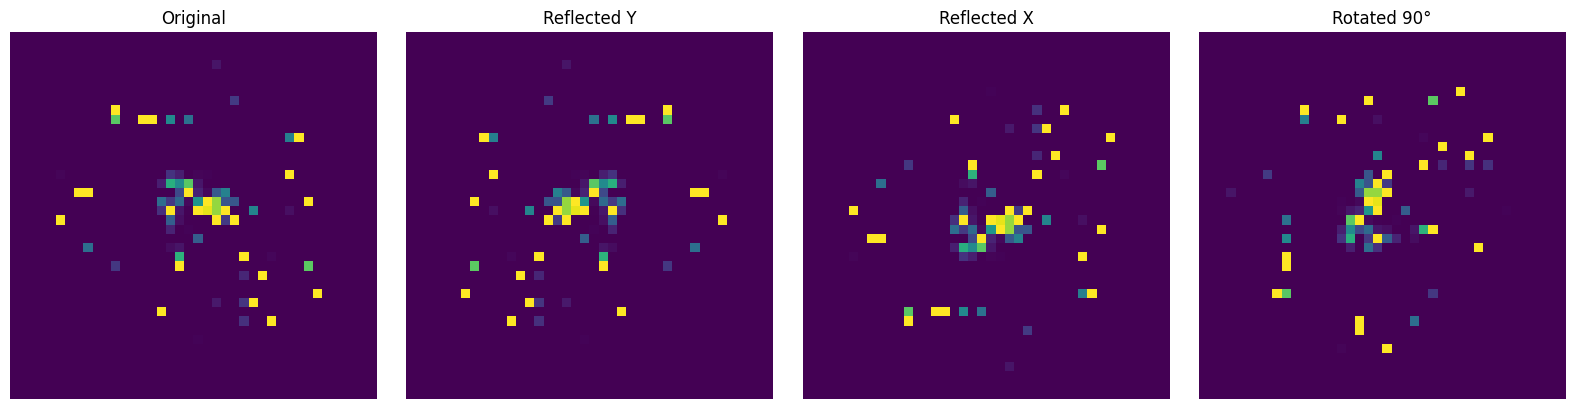

In [6]:
#data and transformed data
matrix = np.array(X_train[1])
matrix_reflected_y = np.fliplr(matrix) # Image Reflected over Y-axis
matrix_reflected_x = np.flipud(matrix) # Image Reflected over X-axis
matrix_rotated_90 = np.rot90(matrix) # Image rotated 90 degrees

n_qubits = 8
layers = 1

result1 = QCNN(matrix, trained_params, U, U_params, embedding_type, cost_fn, n_qubits, layers)
result2 = QCNN(matrix_reflected_y, trained_params, U, U_params, embedding_type, cost_fn, n_qubits, layers)
result3 = QCNN(matrix_reflected_x, trained_params, U, U_params, embedding_type, cost_fn, n_qubits, layers)
result4 = QCNN(matrix_rotated_90, trained_params, U, U_params, embedding_type, cost_fn, n_qubits, layers)

print(f" Output for Original Image: {result1}")
print(f" Output for Image Reflected over Y-axis: {result2}")
print(f" Output for Image Reflected over X-axis: {result3}")
print(f" Output for Image Rotated 90 Degrees: {result4}")


print(Y_train[1])
plt.figure(figsize=(16, 4))

plt.subplot(1, 4, 1)
plt.title('Original')
plt.imshow(matrix)
plt.axis('off')  

plt.subplot(1, 4, 2)
plt.title('Reflected Y')
plt.imshow(matrix_reflected_y)
plt.axis('off') 

plt.subplot(1, 4, 3)
plt.title('Reflected X')
plt.imshow(matrix_reflected_x)
plt.axis('off')  

plt.subplot(1, 4, 4)
plt.title('Rotated 90°')
plt.imshow(matrix_rotated_90)
plt.axis('off') 

plt.tight_layout()  
plt.show()

In [7]:
predictions = [QCNN(x, trained_params, U, U_params, embedding_type, cost_fn, n_qubits, layers) for x in X_test]

accuracy = accuracy_test(predictions, Y_test, cost_fn, binary)
accuracy

1.0

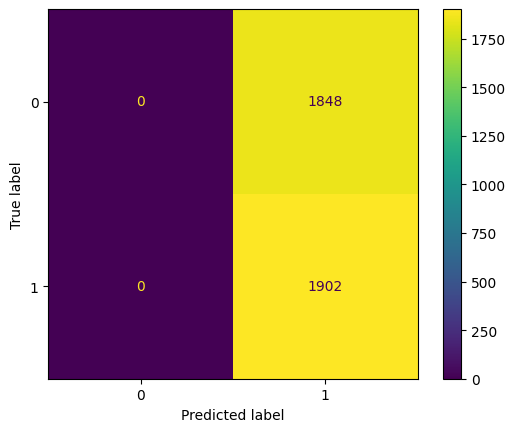

In [8]:
round_predictions = round_predictions_f(predictions, cost_fn)

cm = confusion_matrix(Y_test, round_predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

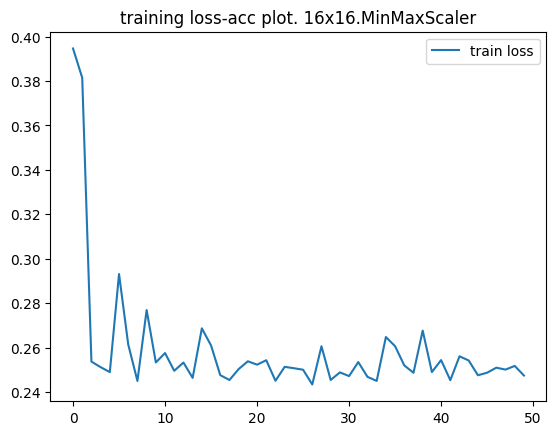

In [9]:
plt.plot(loss_history, label = "train loss")
plt.title("training loss-acc plot. 16x16.MinMaxScaler")
plt.yscale("linear")
plt.legend()
plt.show()